# Causality Vs. Predictivity

### But first, a note!

This class is about learning from data, to teach machines to learn from data, to help businesses learn from data. To do this, you will be using tools. Specifically, the tool of *language*. And the best way to learn languages it to be exposed to them.

**Therefore, in this class I will do my best to expose you to the language of Python (your data tool of choice), as often as possible!**

Always remember: It is *okay* if you don't understand what you're seeing so long as you keep going! You will keep getting exposed throughout this class and by the end of it, you'll look back and realize how far you've come!

## Causality: An Example

Unlike traditional predictive models that simply show correlations, **causal inference approaches allow us to understand the impact of specific actions (in this case, studying) on an outcome variable (final grades), controlling for other factors.**

Using causal inference we seek to establish an Average Treatment Effect (ATE), Average Treatment effect on the Control (ATC), and Average Treatment effect on the Treated (ATT). Each of these measures provides a different perspective on the causal impact of studying. This distinction between prediction and causality is crucial for decision-making and policy interventions, as it helps us understand not just what will happen, but why it will happen and how we can influence it.

In [ ]:
# first we install the causal inference package: https://pypi.org/project/CausalInference/
! pip install CausalInference

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# you'll see this a lot. this is called "setting a seed" when dealing with
# random draws on a computer. For more see: https://colab.research.google.com/drive/164efDyNsyomX6lsyscSfoaD8XqGIirhK?authuser=2#scrollTo=MvnsJvdTBvHx&line=1&uniqifier=1
np.random.seed(643)

# Number of students
number_of_students = 5000

### This section is about what GPA's look like in generaal
# Prior academic performance (GPA) - normally distributed around 2.7
prior_gpa = np.random.normal(2.7, 0.5, number_of_students)
# Clip values to the range 0-4
prior_gpa = np.clip(prior_gpa, 0, 4)

### This section is about what course difficulties look like
# Course difficulty - normally distributed around 5 (on a scale of 1-10)
course_difficulty = np.random.normal(5, 2, number_of_students)
# Clip values to the range 1-10
course_difficulty = np.clip(course_difficulty, 1, 10)

### This section is about how much students study, depending upon GPA
# Study hours - depends on prior GPA (students with higher GPA tend to study more) and some randomness
study_hours = np.floor(1*(2*prior_gpa + np.random.normal(0, 1, number_of_students) > 2))

# Final grade - depends on whether the student studied (2 grade points), prior GPA, course difficulty (negative effect), and some randomness
final_grade = 2*study_hours + prior_gpa - 0.1*course_difficulty + np.random.normal(0, 1, N)
# Clip values to the range 0-4
final_grade = np.clip(final_grade, 0, 4)

# now we place all of our data together
data = pd.DataFrame({'study_hours': study_hours, 'final_grade': final_grade, 'prior_gpa': prior_gpa, 'course_difficulty': course_difficulty})

# Define outcome, treatment, and covariates
OUTCOME = data['final_grade'].values
TREATMENT = data['study_hours'].values # treatment = an action we're trying to understand the effects of
COVARIATES = data.drop(columns=['final_grade', 'study_hours']).values  # by dropping final grades and study hours, everything else is used to determine casuality

# here we create our casual model
cm = CausalModel(OUTCOME, TREATMENT, COVARIATES)

# more on propsensity scores here: https://colab.research.google.com/drive/164efDyNsyomX6lsyscSfoaD8XqGIirhK?authuser=2#scrollTo=qoT6Ef_LDtap&line=1&uniqifier=1
cm.est_propensity_s()

# here we get the average treatment effect (ATE) via a method called matching (more below if you're interested)
cm.est_via_matching()

# next we view our data
print(cm.estimates)



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      1.777      0.511      3.474      0.001      0.774      2.779
           ATC      1.781      0.220      8.106      0.000      1.350      2.211
           ATT      1.777      0.516      3.444      0.001      0.765      2.788



| Effect | Description | Result |
|--------|-------------|--------|
| ATE | Average Treatment Effect. It is an estimation of the treatment's effect on the entire population. | Studying increases the final grade by about 1.777 points on average. |
| ATC | Average Treatment effect on the Control group. It represents the expected effect of the treatment on those who did not receive the treatment (did not study). | If the non-studying students had studied, their grades would have increased by about 1.781 points on average. |
| ATT | Average Treatment effect on the Treated. This measures the effect of the treatment on those who received the treatment (studied). | Studying increased the grades of studying students by about 1.777 points on average. |

## Predictivity: An Example

#### First, about our data

Always, always look and understand your data before attempting to predict upon it.

The Diabetes dataset is a benchmark dataset that is commonly used in machine learning and statistics to evaluate regression models.

This dataset consists of ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements which were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

**Here is a brief explanation of each of the columns:**



| Column | Description |
| ------ | ----------- |
| Age    | Age of the patient |
| Sex    | Sex of the patient |
| BMI    | Body Mass Index |
| BP     | Average blood pressure |
| S1     | Serum Measurement 1 |
| S2     | Serum Measurement 2 |
| S3     | Serum Measurement 3 |
| S4     | Serum Measurement 4 |
| S5     | Serum Measurement 5 |
| S6     | Serum Measurement 6 |
| Target | Disease progression after one year |

In [17]:
import pandas as pd

weee = pd.DataFrame(data=[['a','b','c'],['d','e','f']], columns=['foo', 'fah', 'fee'])

weee['fah'] # Series is a column of data
weee[['fah']] # DataFrame is a pandas special object

,fah
0,b
1,e


Mean Squared Error: 4398.164180544828
R^2 Score: 0.1992086280300558


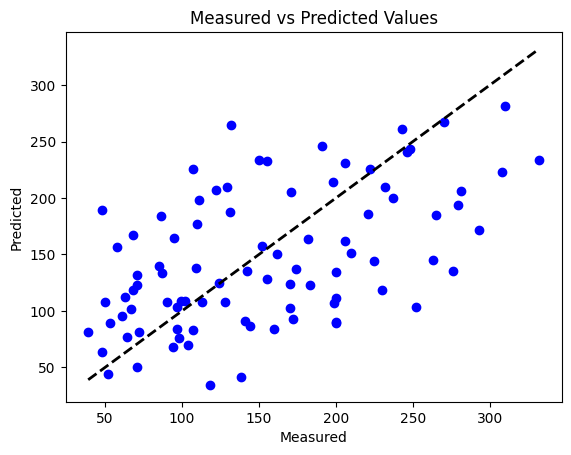

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # scikit-learn documentation: https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# First we load our dataset on diabetes patients
diabetes = load_diabetes()

# next we create a dataframe from the
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                  columns= diabetes['feature_names'] + ['target'])

# next we split our data into "features" and "target" variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# then we "split" our data into training, and test frames (more on that later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=532)

# next we create a "regressor" model in the XGBoost library
xgb = XGBRegressor(objective ='reg:squarederror')

# then we "fit" our data to our model
xgb.fit(X_train, y_train)

# finally we use our trained model to predict upon data it hasn't seen
y_pred = xgb.predict(X_test)

# then we look at our results!
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

# we also can plot our measure versus predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values')
plt.show()


What if we wanted to do **even** better?

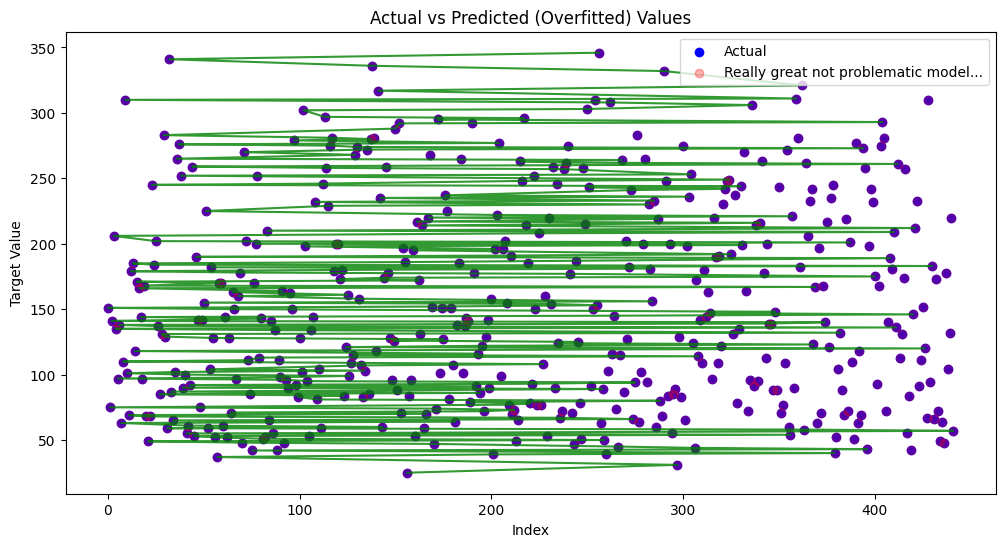

In [ ]:
"""
in the following code I do some hacks to predict EXACTLY our data in a very bad,
no good, definitely do not do this in real life, way.

This is for EXAMPLE purposes to show what NOT to do.
"""

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=None)
dt.fit(X, y)

y_pred = dt.predict(X)

unique_preds, idx = np.unique(y_pred, return_index=True)

# Plot outputs
plt.figure(figsize=(12,6))
plt.scatter(range(len(y)), y, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Really great not problematic model...', alpha=0.3)
plt.plot(idx, unique_preds, color='green', alpha=0.8)
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted (Overfitted) Values')
plt.legend()
plt.show()

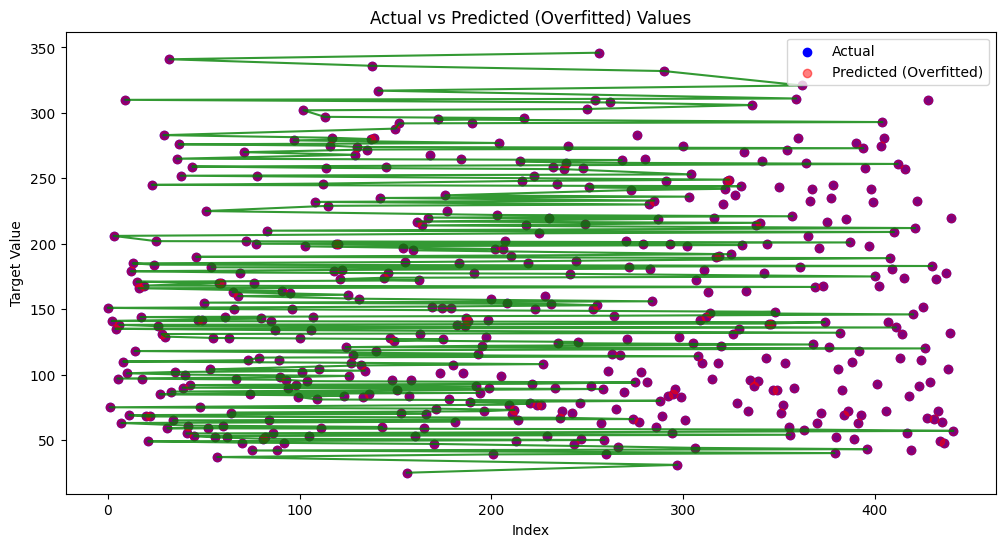

# Notes and Elaborations

## Demonstrating what a seed does when generating random numbers

In [ ]:
import random
random.seed( 3 )
print("Random number with seed 3 : ", random.random()) # will generate a random number

#if you use a diffzent seed you get a different random number
random.seed( 420 )
print("Different number with seed 420 : ", random.random())  # different random number than before

#if you want to use the same random number once again in your program
random.seed( 3 )
print("Same number with seed 3 : ", random.random())  # same random number as initially


Random number with seed 3 :  0.23796462709189137
Different number with seed 420 :  0.026343380459525556
Same number with seed 3 :  0.23796462709189137


## What is a propensity score?

Propensity scores are a fundamental concept in causal inference and are used to **estimate the effect of a treatment, policy, or other intervention by accounting for covariates (variables) that predict receiving the treatment.**

In the code above we're trying to determine the effect of a study program on students' final grades. However, students who participate in the study program might be different from those who don't in various ways - they might be more motivated, have more free time, or have better prior academic records. These differences can create **bias** when estimating the program's effect.

This is where propensity scores come into play. **A propensity score for a given student would represent the probability that they participate in the study program, given their observed characteristics (like motivation level, amount of free time, prior academic records, etc.).** These scores allow us to balance or match students who participated in the program with those who didn't, in a way that makes the two groups as similar as possible. ***Therefore, any remaining differences in outcomes can be more confidently attributed to the program itself, rather than pre-existing differences among the students.***